# Binary Classification on the Edibility of Mushrooms
Students:
* _Andrea Pepe (matr. 0315903)_
* _Matteo Ciccaglione (matr. 0315944)_ 

This document deals with the topic of the binary classification of mushrooms in the `edible` and `poisonous` classes.
The dataset used for the task has been artificially generated starting from a real dataset of the 1987, as part of a study described in this [paper](./mushroom_paper.pdf).

In [124]:
import pandas as pd
import sklearn.linear_model
import sklearn.discriminant_analysis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [125]:
import matplotlib.colors as mcolors
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

## Data Handling
Let's read the dataset using Pandas library and show an overview of data.

In [126]:
df = pd.read_csv("secondary_data_no_miss.csv",sep=';')
df.head(15)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,1.26,x,g,y,f,d,c,w,5.04,1.73,y,f,f,d,a
1,e,10.32,f,e,b,f,a,c,b,4.68,19.44,w,t,f,d,a
2,p,0.92,x,g,p,f,a,c,p,4.59,1.15,k,f,f,d,u
3,p,4.27,x,t,p,f,x,c,w,4.55,6.52,w,f,f,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,5.18,w,f,f,m,a
5,p,1.31,s,s,y,f,f,f,f,3.20,5.39,y,f,f,d,a
6,p,2.58,f,t,r,f,a,c,y,4.87,6.19,y,f,f,d,a
7,p,18.52,f,k,w,t,d,d,w,6.94,29.10,w,f,f,d,a
8,e,10.89,x,s,n,t,e,c,n,8.03,17.11,w,t,l,m,a
9,e,5.64,x,h,y,t,x,c,y,7.55,15.69,w,f,f,d,u


In [127]:
df.shape

(61069, 16)

The dataset has more than 60K entries representing mushrooms.
Each row has 15 features plus the target class.
Only three of them (*cap-diameter, stem-height* and *stem-width*) are numeric; all the others are categorical.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  has-ring              61069 non-null  object 
 13  ring-type             61069 non-null  object 
 14  habitat               61069 non-null  object 
 15  season             

These are the meanings of each feature:

1. *cap-diameter*:         float number in cm, representing the diamatere of the mushroom's cap
2. *cap-shape*:            bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
3. *cap-surface*:          fibrous=i, grooves=g, scaly=y, smooth=s, dry=d, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
4. *cap-color*:            brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k
5. *does-bruise-or-bleed*:    bruises-or-bleeding=t,no=f
6. *gill-attachment*:      adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
7. *gill-spacing*:         close=c, distant=d, none=f
8. *gill-color*:           see cap-color + none=f
9. *stem-height*:		   float number in cm
10. *stem-width*:		   float number in mm   
11. *stem-color*:		   see cap-color + none=f
12. *has-ring*:            ring=t, none=f
13. *ring-type*:           cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
14. *habitat*:             grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
15. *season*:			   spring=s, summer=u, autumn=a, winter=w
16. **class**:             edible=e, poisonous=p

![](./img/mushroom-cap-shape.jpg)

The **dataset** turns out to be pretty **balanced** between the two classes, with almost 34K of poisonous instances and 27K of edible mushrooms.

In [129]:
print(df['class'].value_counts())

class
p    33888
e    27181
Name: count, dtype: int64


To have a better vision of the data, we are going to display both categorical and numeric features. For categorical features a countplot has been used, while for numeric ones the seaborn displot has been adopted. Some features are unbalanced towards specific values, but they relistically represent common characteristics of mushrooms. 

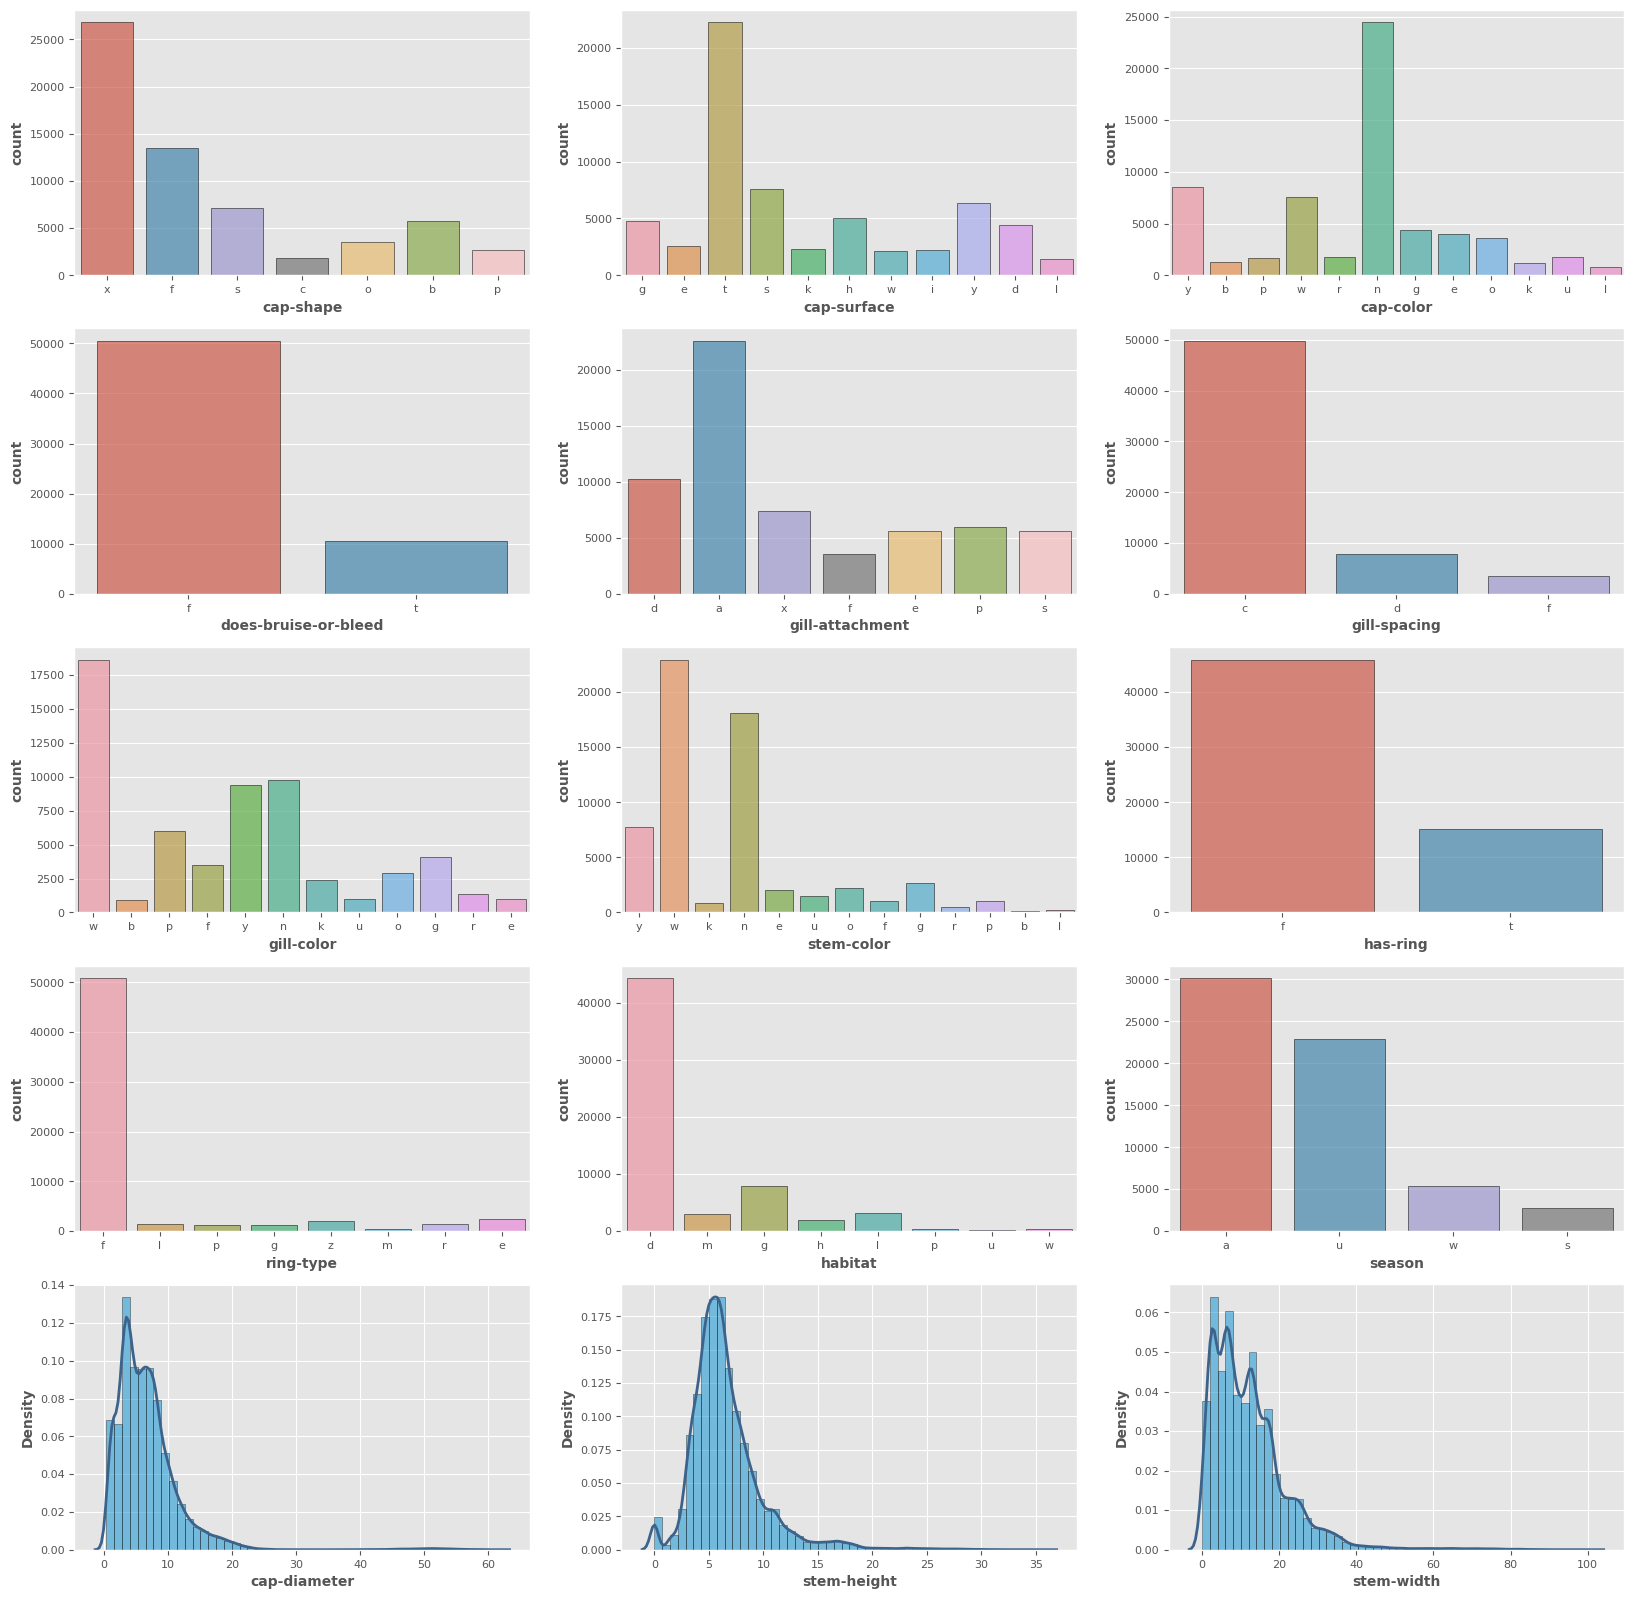

In [130]:
numeric = ['cap-diameter', 'stem-height', 'stem-width']
categorical = ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']

fig = plt.figure(figsize=(20, 20))
i = 1
for col in categorical:
    fig.add_subplot(5, 3, i)
    sns.countplot(x=col , data=df, alpha =.7, edgecolor='black')
    i += 1

i = 1
for col in numeric:
    fig.add_subplot(5, 3, 3*4 + i)
    sns.distplot(df[col], kde_kws={"lw": 2, "color":colors[8]}, 
                 hist_kws={"alpha": .5, "color":colors[0], "edgecolor":"k"})
    i += 1
plt.show()

## Principal Component Analysis (PCA) - trying to represent data
In order to visualize data points in the space or on a plane, we needed to follow a dimensionality reduction approach.

PCA tries to identify a projection of the dataset onto a lower dimensional space, keeping as much variance and information of the dataset as possible. In particular, PCA searches for **linear** projections, resulting in the identification of hyperplanes. We tried to find projections first in a 3-dimensional space and then in a 2-dimensional space, in order to plot the points corresponding to the items of the two classes.

As stated in the previously cited paper, the dataset seems to be not linearly separable, although the dimensionality reduction makes it harder to find a separation hyperplane. 

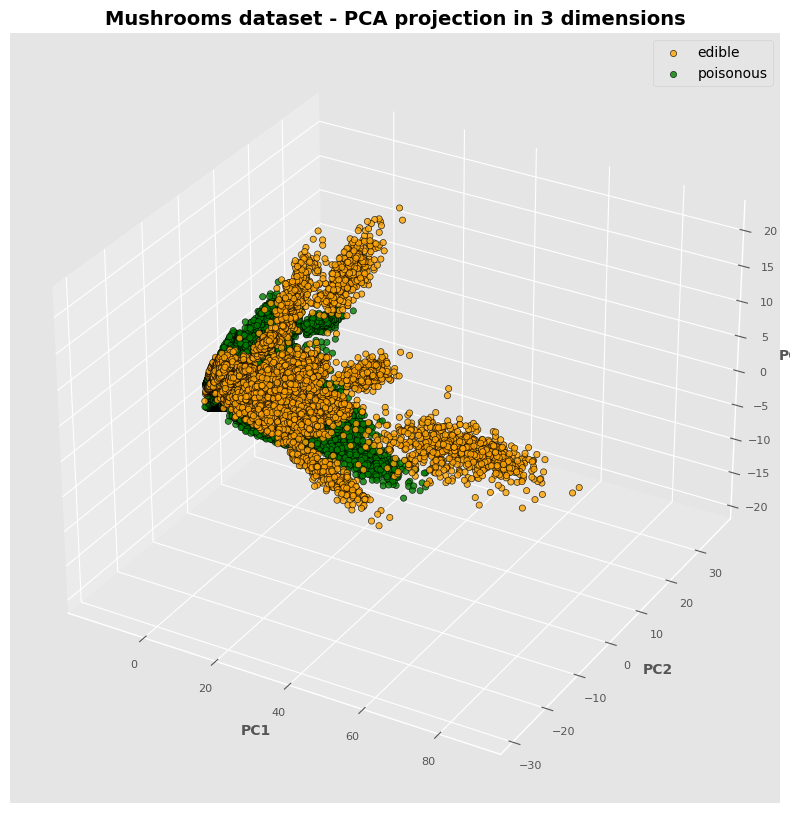

In [131]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
class_labels = df_copy['class']
class_labels = np.where(class_labels == 'p', 'poisonous', 'edible') 

# Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, in order to represent it in a 3D plot
pca = PCA(n_components=3)

le = LabelEncoder()
df_copy['class'] = le.fit_transform(df_copy['class'])
df_copy = pd.get_dummies(df_copy)

principal_components = pca.fit_transform(df_copy)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df_pca['class'] = class_labels

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {'edible': 'orange', 'poisonous': 'green'}

for class_label, color in colors.items():
    df_class = df_pca[df_pca['class'] == class_label]
    ax.scatter(df_class['PC1'], df_class['PC2'], df_class['PC3'], c=colors[class_label], alpha=.8, edgecolor='black', label=class_label)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.legend()
ax.set_title('Mushrooms dataset - PCA projection in 3 dimensions', fontsize=14, fontweight='bold')

plt.show()


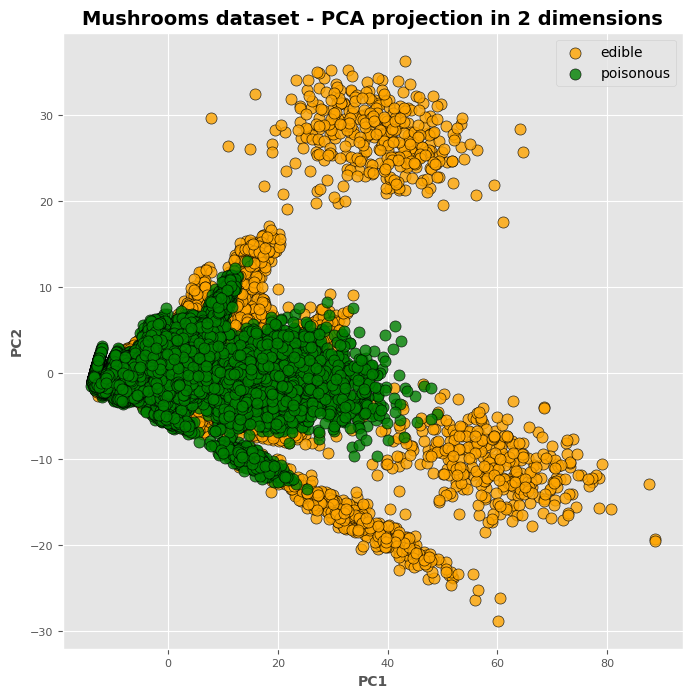

In [132]:
# Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, in order to represent it in a 2D plot
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_copy)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['class'] = class_labels

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

colors = {'edible': 'orange','poisonous': 'green'}

for class_label, color in colors.items():
    df_class = df_pca[df_pca['class'] == class_label]
    ax.scatter(df_class['PC1'], df_class['PC2'], c=colors[class_label], edgecolors='black', alpha=.8, label=class_label)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
ax.set_title('Mushrooms dataset - PCA projection in 2 dimensions', fontsize=14, fontweight='bold')
plt.show()

### Feature correlation analysis

At this point, we evaluated the **feature covariance matrix**, in order to have a better vision of the correleation between them. We used seaborn to plot the matrix as a heatmap. It shows that they have very neutral correlation. The only features that seem to have an higher degree of relation are *cap-diameter*, *stem-height* and *stem-width*. This is fairly normal, since they are all measures related to the size of mushrooms.

Given such results, it's clear that **feature selection** or **feature extraction** do not make too much sense in this situation. 

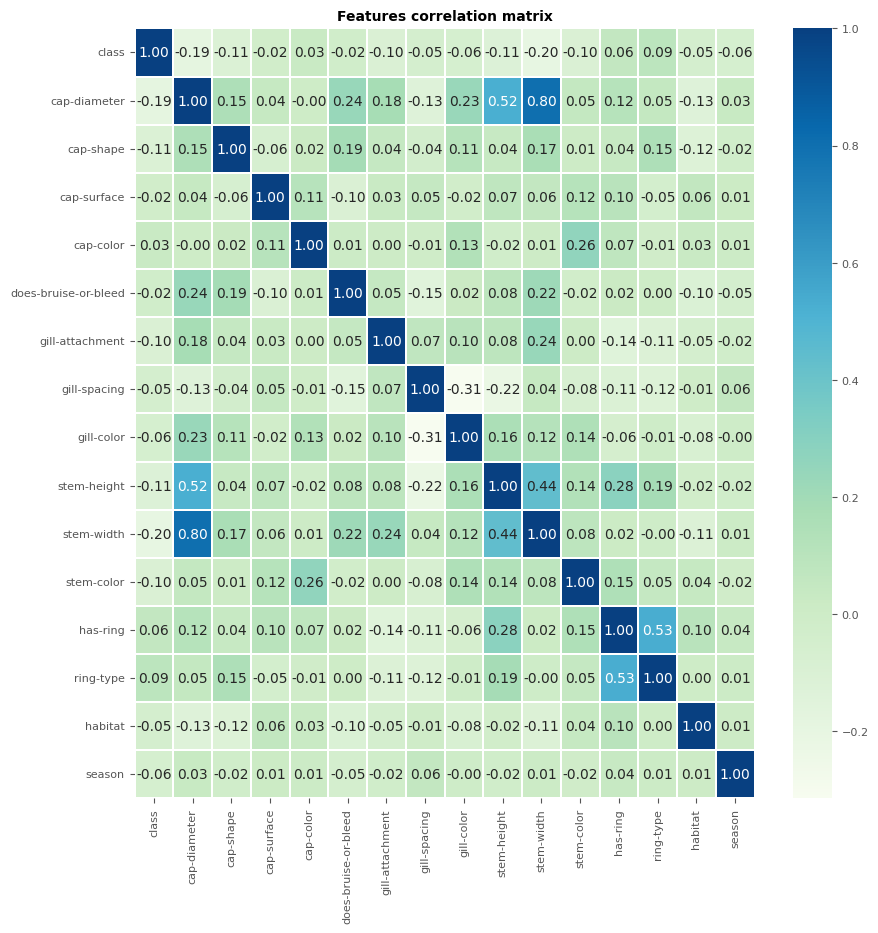

In [133]:
encoded_data = df.copy()
le = LabelEncoder()
encoded_data['class'] = le.fit_transform(df['class'])

for col in encoded_data.columns:
    encoded_data[col] = le.fit_transform(encoded_data[col])

dfDummies = encoded_data
plt.figure(figsize=(10,10))
sns.heatmap(dfDummies.corr(), linewidths=.3, cmap="GnBu", annot=True, fmt=".2f")
plt.title('Features correlation matrix', fontweight="bold")
plt.yticks(rotation=0)
plt.show()

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

models = {}

## Evaluation of different binary classification models

The task of binary classification has been done comparing performances of different classification models. In particular, we considered the followings:

* Logistic Regression
* Linear Discriminant Analysis
* Gaussian Naive Bayes
* Random Forest

### One-hot encoding
Since, as previously showed, most of the features of the training set are categorical, one-hot encoding is required. It is done by invoking the Pandas' `get_dummies()` method.
This process transform the dataset, adding a column for each value assumed by every categorical feature, allowing to specify them in a numeric way.

### Train-test splitting

We decided to split the available dataset into training set and testing set applying a classical 80/20 split. So, the test set is made of the 20% of the original dataset, reaching about 12K entries.

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

data = df.copy()
X = data.drop(columns=['class'])
y = data['class']
y = np.where(y == 'p', 'poisonous', 'edible')
# one-hot encoding
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
X.head(10)

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,1.26,5.04,1.73,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,10.32,4.68,19.44,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.92,4.59,1.15,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,4.27,4.55,6.52,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,3.08,2.67,5.18,False,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
5,1.31,3.20,5.39,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
6,2.58,4.87,6.19,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7,18.52,6.94,29.10,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
8,10.89,8.03,17.11,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
9,5.64,7.55,15.69,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


## Logistic Regression

Logistic Regression is used for binary classification tasks and defines a model which actually classifies items making regression. It's a **Generalized Linear Model**, that applies the non-linear sigmoidal function $\sigma$ to a linear combination of the model's parameters $w$ with the input features $x$:

$$
p(C_1 | x) = \sigma(w^T x) = \frac{1}{1 + e^{-w^T x}}
$$

Logistic Regression uses a discriminative approach to probabilistic classification, making the hypothesis of a **Bernoulli distribution of $p(y|x)$**, with $y \in \{0,1\}$. 

All following model are fitted with balanced class weights.



In [136]:
import json
# Logistic regression fitting
class_weight = {'edible': 1, 'poisonous': 1} # balanced class weights
logreg = LogisticRegression(solver='newton-cholesky', class_weight=class_weight, max_iter=1000)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
report = classification_report(y_test, pred)
print(f'Logistic Regression')
print(report)

Logistic Regression
              precision    recall  f1-score   support

      edible       0.74      0.75      0.74      5458
   poisonous       0.79      0.79      0.79      6756

    accuracy                           0.77     12214
   macro avg       0.77      0.77      0.77     12214
weighted avg       0.77      0.77      0.77     12214



Logistic regression doesn't work very well, giving only the 77 % of accuracy on the test set.
We plotted both the classification report, that shows precision, recall, and f1 values for the two classes, and the **confusion matrix**, which higlights the number of correct and wrong predictions made.

$$
Accuracy = \frac{TP + TN}{N}
$$

$$
Precision = \frac{TP}{TP + FP}
$$

$$
Recall = \frac{TP}{TP + FN}
$$

$$
F1 score = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}
$$

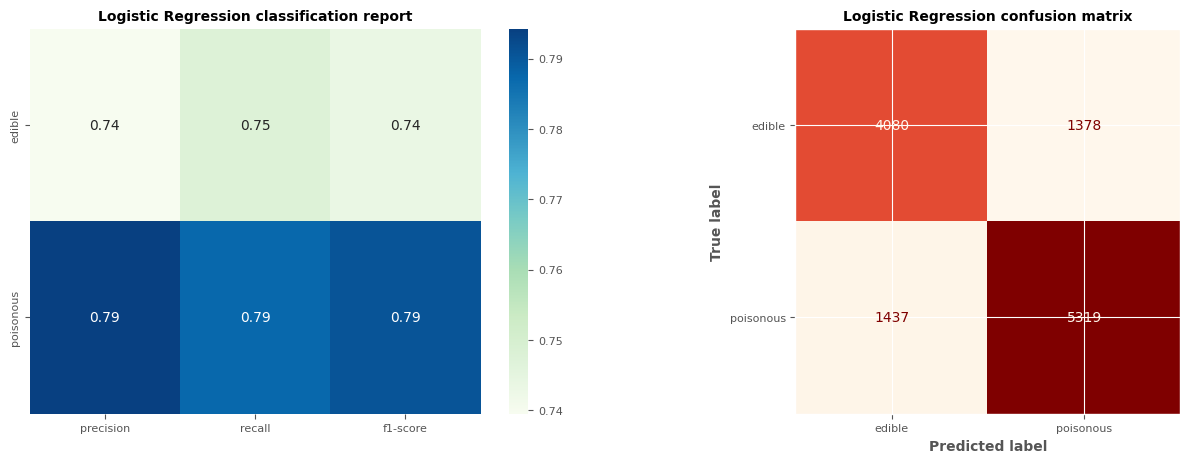

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

report = classification_report(y_test, pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :-3].T, annot=True, cmap="GnBu", ax=ax[0])
ax[0].set_title('Logistic Regression classification report', fontweight="bold")

ConfusionMatrixDisplay(confusion_matrix(y_test, pred), display_labels=['edible', 'poisonous']).plot(cmap='OrRd', ax=ax[1], colorbar=False)
ax[1].set_title('Logistic Regression confusion matrix', fontweight="bold")
plt.show()

In [138]:
from sklearn.model_selection import KFold
from sklearn.metrics import auc, roc_curve

def plot_ROC(model, X, y, n_folds=5, plot_folds=True, stdev=False):
    #skf = StratifiedKFold(n_splits=n_folds, shuffle=False)
    skf = KFold(n_splits=n_folds, shuffle=False)
    tprs = []
    aucs = []

    mean_fpr = np.linspace(0, 1, 100)
    i = 1
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)
        
        fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1], pos_label='poisonous')
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        if plot_folds:
            plt.plot(fpr, tpr, lw=2, alpha=0.4, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
        i = i+1

    mean_tpr = np.mean(tprs, axis=0)
    std_tpr = np.std(tprs, axis=0)

    mean_auc = 0.0
    for elem in aucs:
        mean_auc += elem
    mean_auc /= len(aucs)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_auc:.4f} $\pm$ {std_auc:.4f})', color='k', alpha=1, lw=1.5)
    if stdev:
        plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, color='k', alpha=.3)

    #plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    #plt.show()

For each model we then performed **5-fold cross validation** on the training set data and plotted the **ROC curve** obtained on each fold and then the average curve. 

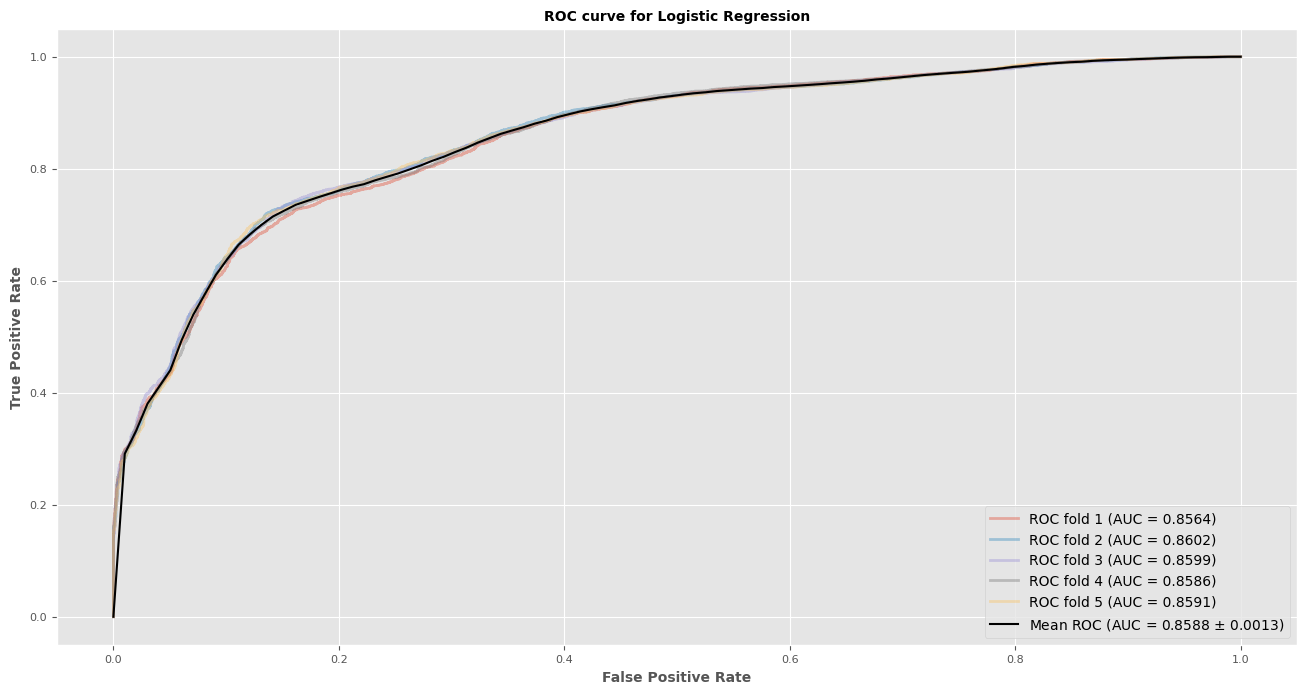

In [139]:
plot_ROC(logreg, X_train, y_train, n_folds=5, plot_folds=True, stdev=False)
plt.title('ROC curve for Logistic Regression', fontweight='bold')
plt.show()

In [140]:
item = {'model': logreg, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f2': 0}
item['accuracy'] = accuracy_score(y_test, pred)
item['precision'] = precision_score(y_test, pred, pos_label='poisonous')
item['recall'] = recall_score(y_test, pred, pos_label='poisonous')
item['f2'] = fbeta_score(y_test, pred, beta=2, pos_label='poisonous')

models['Logistic Regression'] = item

## LDA - Linear Discriminant Analysis
This model uses the Fisher criterion measure to **linearly** project points on a singular line (singular dimension) trying to maximize the distance between the projections of the mean points of the 2 classes on such line, but, at the same time, minimizing the within-class variance, in order to have as lower dispersion as possible in the projections. 
The projection corresponds to a linear transformation of type $$y = w^T x$$.
This is an approach based on dimensionality reduction that tries to find the discriminative functions or thresholds that best separates the two classes and that can be used for performing predictions.

Given $m_1,m_2$ the projections of the mean points of the two classes on the separation hyperplane, the **within-class variance** is defined as:
$$
s_i^2 = \sum_{x \in C_i}{(w^T x - m_i)^2}
$$

and the **Fisher Criterion** to be maximized with respect to $w$ (the vector representing the direction of projection) is:
$$
J(w) = \frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}
$$ 

In [141]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
pred = lda.predict(X_test)
report = classification_report(y_test, pred)
print(f'Linear Discriminant Analysis')
print(report)

Linear Discriminant Analysis
              precision    recall  f1-score   support

      edible       0.74      0.75      0.75      5458
   poisonous       0.80      0.79      0.79      6756

    accuracy                           0.77     12214
   macro avg       0.77      0.77      0.77     12214
weighted avg       0.77      0.77      0.77     12214



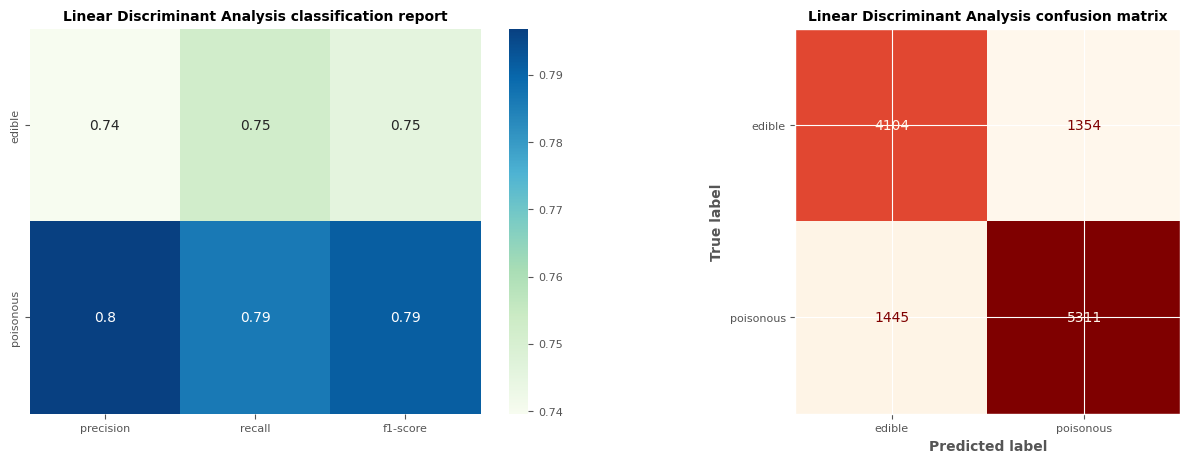

In [142]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

report = classification_report(y_test, pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :-3].T, annot=True, cmap="GnBu", ax=ax[0])
ax[0].set_title('Linear Discriminant Analysis classification report', fontweight="bold")

ConfusionMatrixDisplay(confusion_matrix(y_test, pred), display_labels=['edible', 'poisonous']).plot(cmap='OrRd', ax=ax[1], colorbar=False)
ax[1].set_title('Linear Discriminant Analysis confusion matrix', fontweight="bold")
plt.show()

As shown by the following plot, Logistic Regression and Linear Discriminant Analysis have almost the same level of performances in terms of ROC curve and AUC. This is true also for what concerns the precision, recall and f1 metrics. 

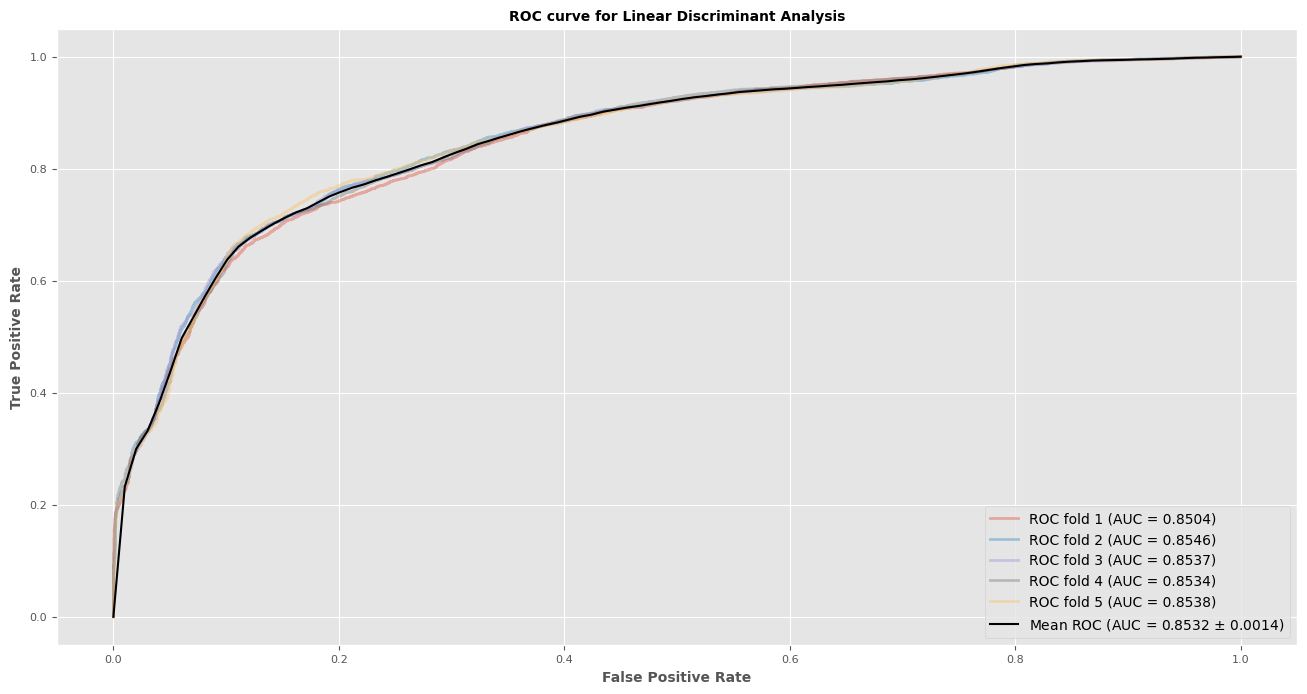

In [143]:
plot_ROC(lda, X_train, y_train, n_folds=5, plot_folds=True, stdev=False)
plt.title('ROC curve for Linear Discriminant Analysis', fontweight='bold')
plt.show()

In [144]:
item = {'model': lda, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f2': 0}
item['accuracy'] = accuracy_score(y_test, pred)
item['precision'] = precision_score(y_test, pred, pos_label='poisonous')
item['recall'] = recall_score(y_test, pred, pos_label='poisonous')
item['f2'] = fbeta_score(y_test, pred, beta=2, pos_label='poisonous')

models['Linear Discriminant Analysis'] = item

## Naive Bayes
Naive Bayes classifier uses Bayesian approach to classification, inspired by generative language models. It's a probabilistic model that, instead of directly identify $p(C_k|x)$ for each class, it models the classes through the conditional probability $p(x|C_k)$ and derive posterior distributions of classes wrt features applying the Bayes rule:
$$
p(C_k|x) = \frac{p(x|C_k)p(C_k)}{p(x)}
$$

Prior distribution $p(C_k)$ and $p(x|C_k)$ can be derived from the training set, by Maximum Likelihood estimation.

The `Naive` assumption facilitates the computation of $p(x|C_k)$: features $x_1, \dots, x_d$ are assumed to be pairwise independent conditionally to $C_k$ (*bag of words* model):
$$
p(x|C_k) = \prod_{j=1}^{d} p(x_i|C_k)
$$

Deriving posterior probabilities:
$$
p(C_1|x) = \frac{1}{1 + e^{-a}}
$$

with $a$ equal to the **log odds** of the posterior probabilities:
$$
a = log\frac{p(C_1|x)}{p(C_2|x)}
$$

In [145]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)
report = classification_report(y_test, pred)
print(f'Gaussian Naive Bayes')
print(report)

Gaussian Naive Bayes
              precision    recall  f1-score   support

      edible       0.69      0.63      0.66      5458
   poisonous       0.72      0.77      0.74      6756

    accuracy                           0.71     12214
   macro avg       0.70      0.70      0.70     12214
weighted avg       0.70      0.71      0.70     12214



Unfortunatly, Naive Bayes has worse performances of the two previous classifiers.

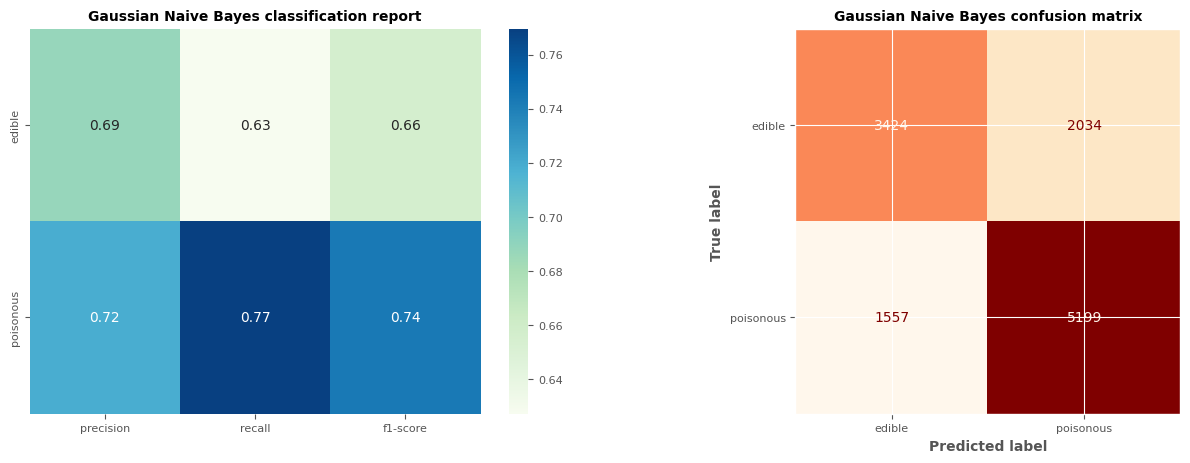

In [146]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

report = classification_report(y_test, pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :-3].T, annot=True, cmap="GnBu", ax=ax[0])
ax[0].set_title('Gaussian Naive Bayes classification report', fontweight="bold")

ConfusionMatrixDisplay(confusion_matrix(y_test, pred), display_labels=['edible', 'poisonous']).plot(cmap='OrRd', ax=ax[1], colorbar=False)
ax[1].set_title('Gaussian Naive Bayes confusion matrix', fontweight="bold")
plt.show()

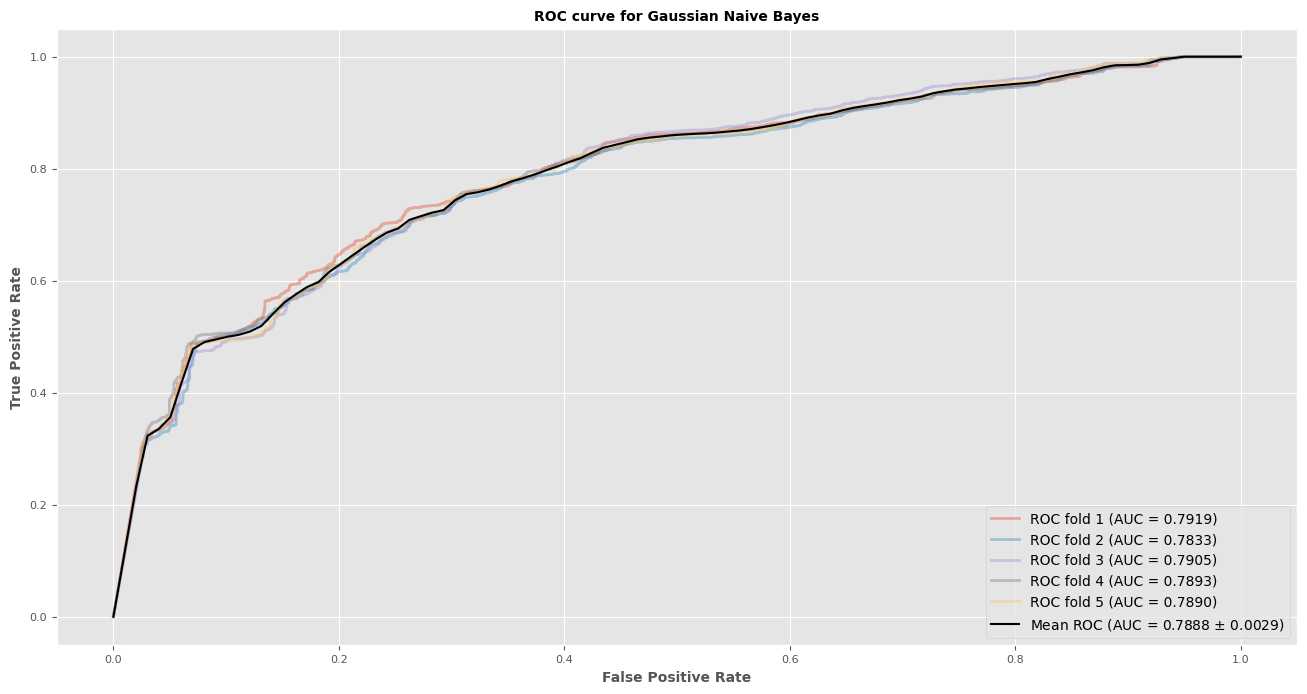

In [147]:
plot_ROC(nb, X_train, y_train, n_folds=5, plot_folds=True, stdev=False)
plt.title('ROC curve for Gaussian Naive Bayes', fontweight='bold')
plt.show()

In [148]:
item = {'model': nb, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f2': 0}
item['accuracy'] = accuracy_score(y_test, pred)
item['precision'] = precision_score(y_test, pred, pos_label='poisonous')
item['recall'] = recall_score(y_test, pred, pos_label='poisonous')
item['f2'] = fbeta_score(y_test, pred, beta=2, pos_label='poisonous')

models['Naive Bayes'] = item

# Random Forest
This model uses **ensemble** methods to combine different poor and simple classifiers, in particular Decision Tree models. The prediction is performed as the majority class resulting from votes of the different trees. Random Forest applies the *bagging* technique to a set of random decision trees. Each tree is grown selecting at random $m$ features from a sample of data of the dataset, picking the best variable among them and splitting the node into two children. This operation is performed for each node of the tree.

Random Forest actually uses randomicity to construct different Decision Tree models on the same data.

We have fixed some hyperparameters of the model a priori:
* *n_estimators* : the number of decision trees is fixed to 100
* *max_depth*: the depth of the trees is limited to a maximum of 5

In [149]:
from sklearn.ensemble import RandomForestClassifier

# hyperparameters decided a priori
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
report = classification_report(y_test, pred)
print(f'Random Forest')
print(report)

Random Forest
              precision    recall  f1-score   support

      edible       0.88      0.77      0.82      5458
   poisonous       0.83      0.91      0.87      6756

    accuracy                           0.85     12214
   macro avg       0.85      0.84      0.85     12214
weighted avg       0.85      0.85      0.85     12214



Random Forest is the model with the best performances so far. In particular, the number of False Negatives (the most important given the specific classification task) is 592, much lower than in other classifiers.

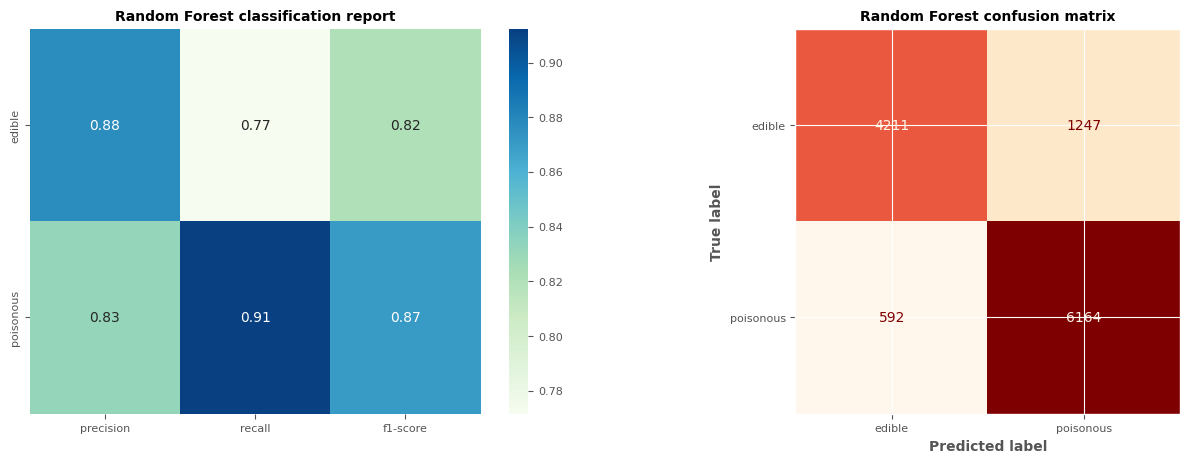

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

report = classification_report(y_test, pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :-3].T, annot=True, cmap="GnBu", ax=ax[0])
ax[0].set_title('Random Forest classification report', fontweight="bold")

ConfusionMatrixDisplay(confusion_matrix(y_test, pred), display_labels=['edible', 'poisonous']).plot(cmap='OrRd', ax=ax[1], colorbar=False)
ax[1].set_title('Random Forest confusion matrix', fontweight="bold")
plt.show()

It also has a very good ROC curve and value of AUC, equal to 93%.

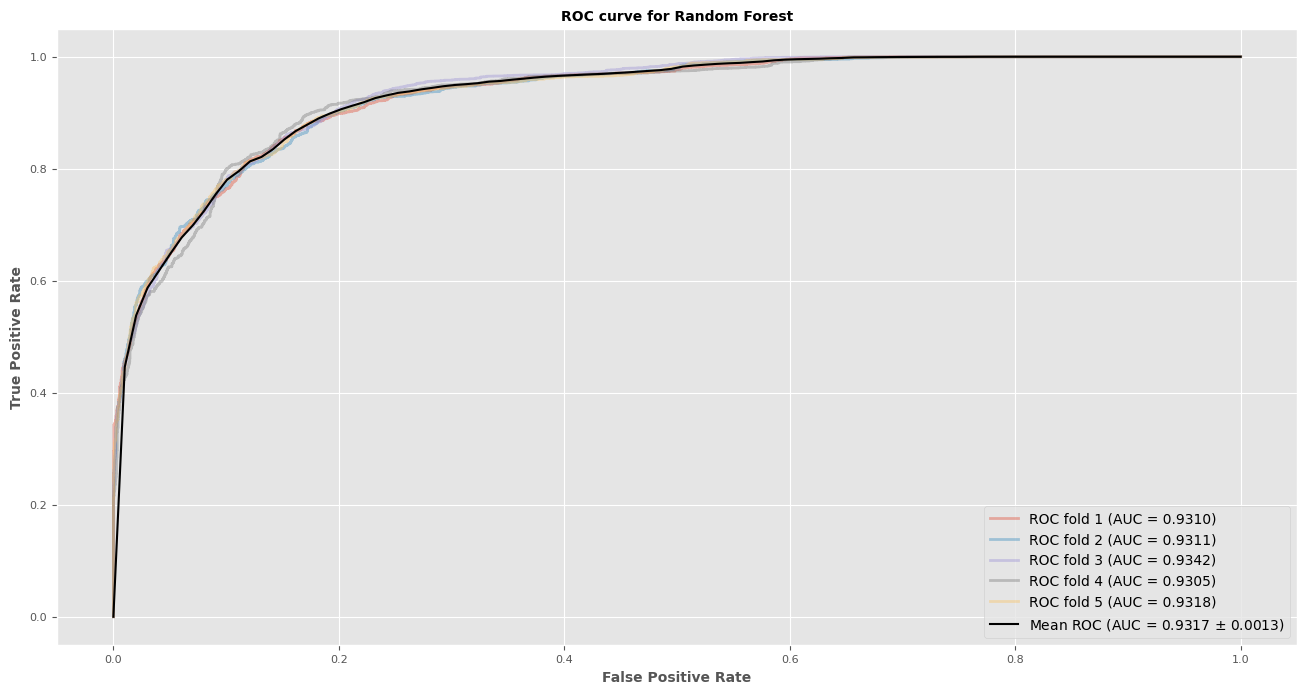

In [151]:
plot_ROC(rf, X_train, y_train, n_folds=5, plot_folds=True, stdev=False)
plt.title('ROC curve for Random Forest', fontweight='bold')
plt.show()

In [152]:
item = {'model': rf, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f2': 0}
item['accuracy'] = accuracy_score(y_test, pred)
item['precision'] = precision_score(y_test, pred, pos_label='poisonous')
item['recall'] = recall_score(y_test, pred, pos_label='poisonous')
item['f2'] = fbeta_score(y_test, pred, beta=2, pos_label='poisonous')

models['Random Forest'] = item

# Model comparison

Here we plotted the performance metrics considered for each classifier all together. As seen before, Rando Forest is clearly the model the has the best behaviour among the 4 considered models.

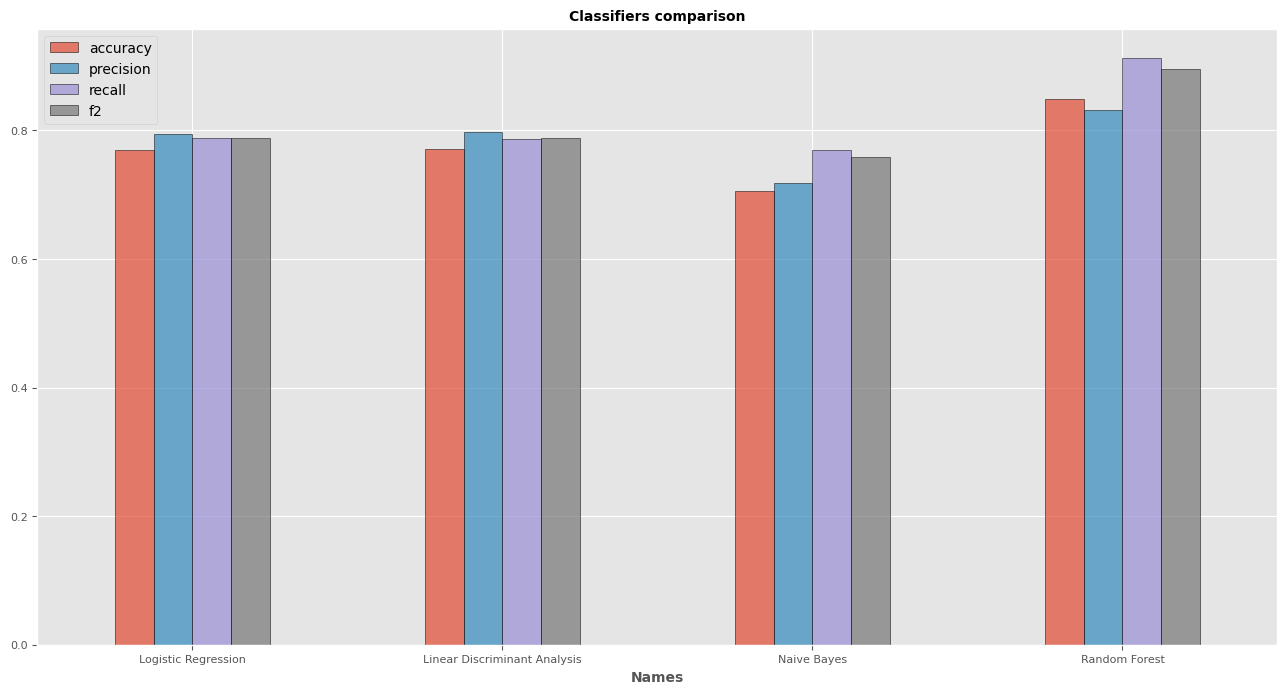

In [153]:
models_performances = pd.DataFrame.from_dict(models, orient='index')
models_performances = models_performances.drop(columns=['model'])
models_performances['Names'] = models_performances.index

cols = ['accuracy', 'precision', 'recall', 'f2']
models_performances.plot('Names', y=cols, kind='bar', stacked=False, edgecolor='black', alpha=0.7)
ax = plt.gca()
ax.set_xticklabels(models_performances['Names'], rotation=0)
plt.title('Classifiers comparison', fontweight='bold')
plt.show()

In [154]:
item = {'model': logreg, 'accuracy': 0, 'precision': 0, 'recall': 0, 'f2': 0}
item['accuracy'] = accuracy_score(y_test, pred)
item['precision'] = precision_score(y_test, pred, pos_label='poisonous')
item['recall'] = recall_score(y_test, pred, pos_label='poisonous')
item['f2'] = fbeta_score(y_test, pred, beta=2, pos_label='poisonous')

models['Logistic Regression'] = item

## Improving Random Forest performances

We then tried to improve the Random Forest classifier, by loosening the contraints on hyperparameters. We used the scikit-learn `RandomizedSearchCV` class to find the best hyperparameters for the model, using **5-fold cross-validation**. We permitted to select the number of decision trees in the range $[10, 199]$ and their maximum depth in the range $[0, 39]$.

Moreover, since we are interested in reducing as much as possible prediction errors on the *poisonous* class (in particular False Negatives, FN), we decided to fit the model using **unbalanced class weights**, giving to the *poisonous* class a weight of 6 and a weight equal to 4 to the *edible* class. 

In [155]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [x for x in range(10, 200)],
              'max_depth': [i for i in range (40)]}

class_weight = {'edible': 4, 'poisonous': 6} # unbalanced class weights - poisonous are more important to detect

# Create a random forest classifier
rf_constrained = RandomForestClassifier(class_weight=class_weight, random_state=1000)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf_constrained, 
                                 param_distributions = param_dist,  
                                 cv=5, random_state=1000)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
best_params = rand_search.best_params_

Best hyperparameters: {'n_estimators': 145, 'max_depth': 24}


In [156]:
irf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=1000)
irf.fit(X_train, y_train)
pred = irf.predict(X_test)
report = classification_report(y_test, pred)
print(f'Random Forest')
print(report)

Random Forest
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      5458
   poisonous       1.00      1.00      1.00      6756

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



This Random Forest classifier almost reaches perfection, commiting only 1 prediction error on the testing set. 

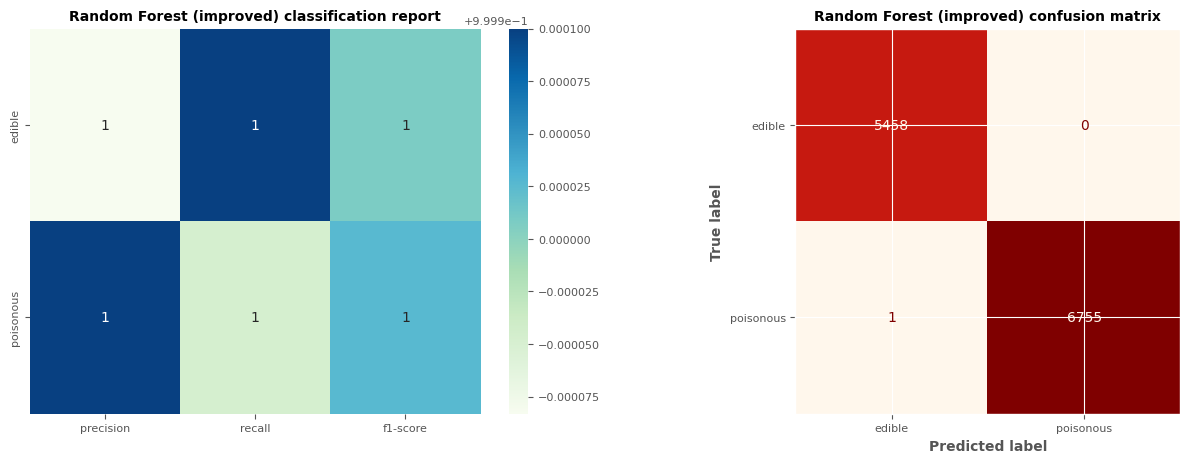

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

report = classification_report(y_test, pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :-3].T, annot=True, cmap="GnBu", ax=ax[0])
ax[0].set_title('Random Forest (improved) classification report', fontweight="bold")

ConfusionMatrixDisplay(confusion_matrix(y_test, pred), display_labels=['edible', 'poisonous']).plot(cmap='OrRd', ax=ax[1], colorbar=False)
ax[1].set_title('Random Forest (improved) confusion matrix', fontweight="bold")
plt.show()

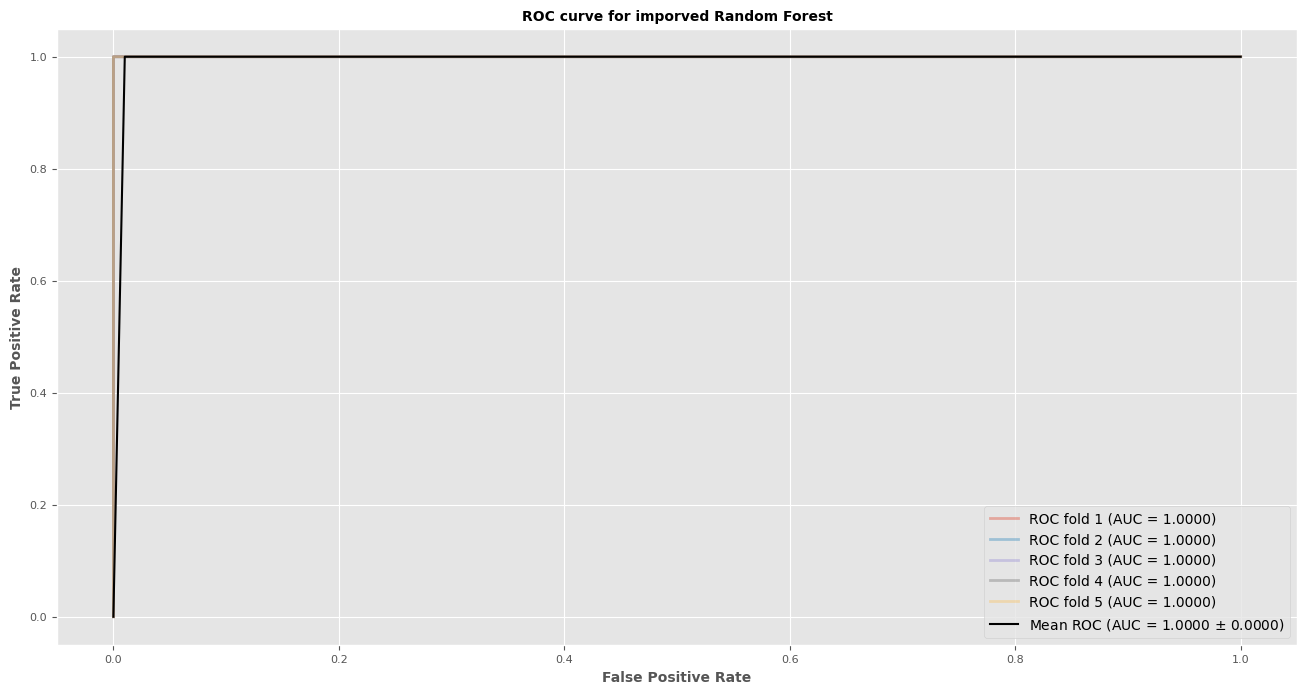

In [158]:
plot_ROC(irf, X_train, y_train, n_folds=5, plot_folds=True, stdev=False)
plt.title('ROC curve for imporved Random Forest', fontweight='bold')
plt.show()

# Multi-Layer Perceptron Neural Network

We also tried to use a simple Muli-Layer Perceptron Neural Network, with only 1 hidden layer using the RELU activation function, having a number of nodes/neurons that is the double of the dataset dimensionality.
Also in this case, we fixed some hyperparameters, but tried to find the best option by varying two of them:
* *solver*: SGD (Stochastic Gradient Descent) or Adam
* *alpha*: regularization hyperparameter, 0.0001 or an higher value of 0.05

In [159]:
from sklearn.neural_network import MLPClassifier

test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100)
n_features = X_train.shape[1]
param_random = {
    'hidden_layer_sizes': [(2 *n_features)],
    'max_iter': [100],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['adaptive'],
}

mlp_clf = MLPClassifier(random_state=1000)
grid = RandomizedSearchCV(mlp_clf, param_random, n_jobs= -1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_) 

{'solver': 'adam', 'max_iter': 100, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 184, 'alpha': 0.0001, 'activation': 'relu'}


Adam method works better than SGD in this case and also a lower value of $\alpha$ is preferred. This last choice indicates that, also with a very low regularization, the model does not overfit. This can be mainly motivated by the large size of the dataset.

The NN committed no prediction errors on the testing set!

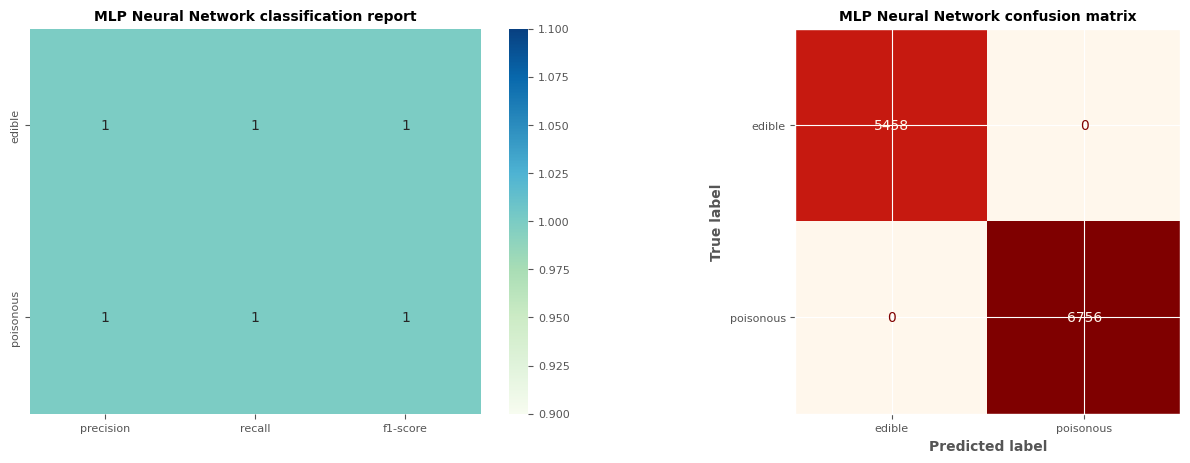

In [160]:
grid_predictions = grid.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

report = classification_report(y_test, grid_predictions, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :-3].T, annot=True, cmap="GnBu", ax=ax[0])
ax[0].set_title('MLP Neural Network classification report', fontweight="bold")

ConfusionMatrixDisplay(confusion_matrix(y_test, grid_predictions), display_labels=['edible', 'poisonous']).plot(cmap='OrRd', ax=ax[1], colorbar=False)
ax[1].set_title('MLP Neural Network confusion matrix', fontweight="bold")
plt.show()

## K-Nearest Neighbors

Finally, we also considered a model that follows a **non-parametric** approach like KNN. It tries to exploit the relation:
$$
p(x) \simeq \frac{k}{nV}
$$

to estimate $p(x)$ for any $x$, by **fixing $k$** and deriving *V* from data.

We used the **distance** metric to compute similarity between data points, weighting more points closer to $x$.
Several instances of KNN model has been fitted and evaluated fixing different values of $k$; in particular:
$$
k = 3^i \quad \quad \text{for } i=1, \dots, 9
$$

In [161]:
from sklearn.neighbors import KNeighborsClassifier

test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100)

ks = [3 ** x for x in range(1, 10)]
accuracies = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    report = classification_report(y_test, pred)
    accuracies.append(accuracy_score(y_test, pred))
    print(f'{k}-Nearest Neighbors')
    print(report)

3-Nearest Neighbors
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      5458
   poisonous       1.00      1.00      1.00      6756

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

9-Nearest Neighbors
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      5458
   poisonous       1.00      1.00      1.00      6756

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

27-Nearest Neighbors
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      5458
   poisonous       1.00      1.00      1.00      6756

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg 

KNN turns out to be very efficient in prediction with reasonably values of $k$ (from 3 to 81).
After that point, increasing $k$ results in a large performance degradation. Such behaviour is representing plotting the values of the accuracy obtained for the different values of $k$. 

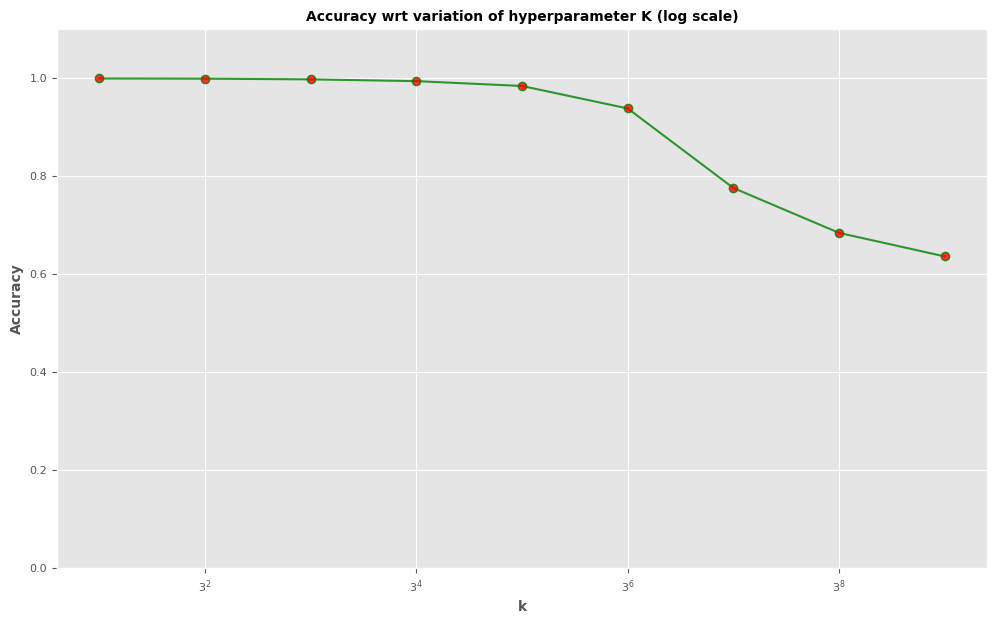

In [162]:
plt.figure(figsize=(12,7))
plt.plot(ks, accuracies, marker='o', color='green', mfc="red", alpha=.8 ,linewidth=1.5, markersize=6)
plt.title('Accuracy wrt variation of hyperparameter K (log scale)', fontweight="bold")
plt.xticks(ks)
plt.xlabel('k')
ax = plt.gca()
ax.set_xscale('log', base=3)
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.show()